In [26]:
# 引入相关的地理空间分析类库 
import geopandas
from geopandas import GeoSeries
from shapely.geometry import Polygon, Point
import pandas as pd

In [3]:
# 读入shapefile矢量数据
water_body = geopandas.read_file("广东省_汕头市_全市水体(河流、人工湖、水渠等)分布矢量shp")
roads = geopandas.read_file("汕头市道路")

In [4]:
# 查看水体矢量数据
water_body

,osm_id,code,fclass,name,geometry
0,9560055,8200,water,None,"POLYGON ((116.79400 23.55550, 116.79465 23.555..."
1,9560055,8202,river,None,"POLYGON ((116.79400 23.55550, 116.79465 23.555..."
2,9562131,8200,water,None,"POLYGON ((116.52251 23.20734, 116.52265 23.207..."
3,9562877,8200,water,None,"POLYGON ((116.51696 23.20321, 116.51751 23.203..."
4,9563691,8200,water,None,"POLYGON ((116.53058 23.21020, 116.53067 23.210..."
...,...,...,...,...,...
2269,904433234,8200,water,None,"POLYGON ((116.31981 23.20260, 116.31996 23.202..."
2270,904433235,8200,water,None,"POLYGON ((116.31935 23.20015, 116.31935 23.200..."
2271,904433236,8200,water,None,"POLYGON ((116.31938 23.20041, 116.31941 23.200..."
2272,904433238,8200,water,None,"POLYGON ((116.31075 23.19227, 116.31078 23.192..."


In [5]:
roads

,osm_id,name,ref,type,oneway,bridge,maxspeed,geometry
0,52434088,None,None,unclassified,0,0,NaN,"LINESTRING (116.71650 23.43566, 116.71655 23.4..."
1,52435113,½ðºè¹«Â·,S503,primary,1,0,NaN,"LINESTRING (116.86950 23.55114, 116.87016 23.5..."
2,52435117,½ðºè´óÇÅ,S503,primary,1,1,NaN,"LINESTRING (116.82128 23.45840, 116.81919 23.4..."
3,52435119,½ðºè¹«Â·,S503,primary,1,0,NaN,"LINESTRING (116.81919 23.45449, 116.81840 23.4..."
4,52435120,½ðÖÞ´óÇÅ,S503,primary,1,1,NaN,"LINESTRING (116.80210 23.43164, 116.79877 23.4..."
...,...,...,...,...,...,...,...,...
8304,988813915,None,None,residential,0,0,NaN,"LINESTRING (117.10647 23.40782, 117.10680 23.4..."
8305,988813916,None,None,residential,0,0,NaN,"LINESTRING (117.10731 23.40589, 117.10769 23.4..."
8306,988813918,None,None,tertiary,1,0,NaN,"LINESTRING (117.09463 23.45419, 117.09461 23.4..."
8307,988813919,None,None,residential,0,0,NaN,"LINESTRING (117.09904 23.45365, 117.09913 23.4..."


In [6]:
# 查看所有道路类型
roads["type"].unique()

array(['unclassified', 'primary', 'tertiary', 'trunk_link',
       'motorway_link', 'motorway', 'secondary', 'primary_link',
       'secondary_link', 'residential', 'trunk', 'footway', 'service',
       'living_street', 'pedestrian', 'steps', 'path', 'construction',
       'track', 'tertiary_link', 'bus_stop', 'cycleway', 'road',
       'bridleway', 'services', 'rest_area'], dtype=object)

In [7]:
# 查看矢量数据类型
print(water_body.type.unique())
print(roads.type.unique())

['Polygon' 'MultiPolygon']
['LineString' 'MultiLineString']


<AxesSubplot:>

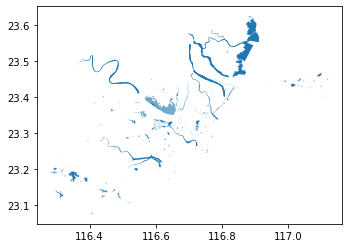

In [8]:
# 水体矢量可视化
water_body.plot()

<AxesSubplot:>

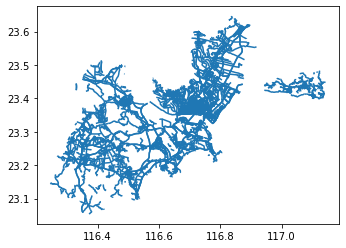

In [9]:
# 路网矢量可视化
roads.plot()

In [31]:
# 将道路类型分为干线和支线
## 提取干线
trunk_roads = roads.query("type=='primary' or type=='tertiary' or type=='trunk_link' or type=='motorway_link' or type=='motorway' or type=='secondary' or type=='tprimary_link' or type=='secondary_link' or type=='trunk' or type=='tertiary_link'")
## 提取支线
branch_roads = roads.query("type!='primary' and type!='tertiary' and type!='trunk_link' and type!='motorway_link' and type!='motorway' and type!='secondary' and type!='tprimary_link' and type!='secondary_link' and type!='trunk' and type!='tertiary_link'")

In [30]:
# 查看干线
trunk_roads

,osm_id,name,ref,type,oneway,bridge,maxspeed,geometry
1,52435113,½ðºè¹«Â·,S503,primary,1,0,NaN,"LINESTRING (116.86950 23.55114, 116.87016 23.5..."
2,52435117,½ðºè´óÇÅ,S503,primary,1,1,NaN,"LINESTRING (116.82128 23.45840, 116.81919 23.4..."
3,52435119,½ðºè¹«Â·,S503,primary,1,0,NaN,"LINESTRING (116.81919 23.45449, 116.81840 23.4..."
4,52435120,½ðÖÞ´óÇÅ,S503,primary,1,1,NaN,"LINESTRING (116.80210 23.43164, 116.79877 23.4..."
5,52436162,ºìÁì½íÂ·,None,tertiary,0,0,NaN,"LINESTRING (116.68803 23.35604, 116.68817 23.3..."
...,...,...,...,...,...,...,...,...
8301,988813912,ÖÐÐËÂ·,G539;S336,trunk,0,0,NaN,"LINESTRING (117.00764 23.43514, 117.00744 23.4..."
8302,988813913,None,None,tertiary,0,0,NaN,"LINESTRING (117.10397 23.41033, 117.10433 23.4..."
8303,988813914,None,None,tertiary,0,0,NaN,"LINESTRING (117.10206 23.40843, 117.10213 23.4..."
8306,988813918,None,None,tertiary,1,0,NaN,"LINESTRING (117.09463 23.45419, 117.09461 23.4..."


<AxesSubplot:>

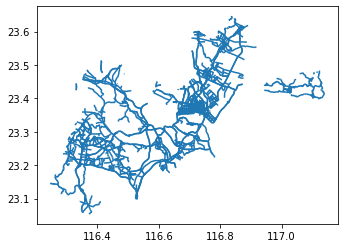

In [28]:
# 干线可视化
trunk_roads.plot()

In [32]:
# 查看支线
branch_roads

,osm_id,name,ref,type,oneway,bridge,maxspeed,geometry
0,52434088,None,None,unclassified,0,0,NaN,"LINESTRING (116.71650 23.43566, 116.71655 23.4..."
29,116806826,None,None,primary_link,1,0,NaN,"LINESTRING (116.73109 23.31547, 116.73136 23.3..."
40,116810626,None,None,unclassified,0,0,NaN,"LINESTRING (116.74827 23.34221, 116.74749 23.3..."
54,147135561,None,None,residential,0,0,NaN,"LINESTRING (116.69648 23.36653, 116.69727 23.3..."
55,147135564,None,None,unclassified,0,0,NaN,"LINESTRING (116.70108 23.37472, 116.70119 23.3..."
...,...,...,...,...,...,...,...,...
8295,912301081,None,None,footway,0,0,NaN,"LINESTRING (117.12116 23.46090, 117.12105 23.4..."
8300,988813911,None,None,residential,0,0,NaN,"LINESTRING (117.00979 23.43675, 117.00921 23.4..."
8304,988813915,None,None,residential,0,0,NaN,"LINESTRING (117.10647 23.40782, 117.10680 23.4..."
8305,988813916,None,None,residential,0,0,NaN,"LINESTRING (117.10731 23.40589, 117.10769 23.4..."


<AxesSubplot:>

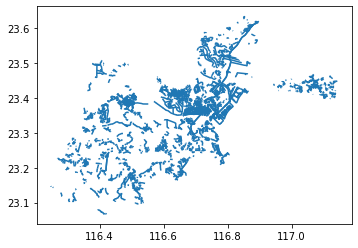

In [33]:
# 支线可视化
branch_roads.plot()

In [34]:
# 查看参考系
print(water_body.crs)
print(roads.crs)

epsg:4326
epsg:4326


In [35]:
# 为了计算面积和长度，需对shapefile矢量数据进行重投影
# 用estimate_utm_crs()方法获取矢量数据的最佳投影坐标系
water_body.estimate_utm_crs() 

<Derived Projected CRS: EPSG:32650>
Name: WGS 84 / UTM zone 50N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 114°E and 120°E, northern hemisphere between equator and 84°N, onshore and offshore. Brunei. China. Hong Kong. Indonesia. Malaysia - East Malaysia - Sarawak. Mongolia. Philippines. Russian Federation. Taiwan.
- bounds: (114.0, 0.0, 120.0, 84.0)
Coordinate Operation:
- name: UTM zone 50N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [36]:
# 进行坐标系的重投影
water_reprj = water_body.to_crs("EPSG:32650")
roads_reprj = roads.to_crs("EPSG:32650")
trunk_reprj = trunk_roads.to_crs("EPSG:32650")
branch_reprj = branch_roads.to_crs("EPSG:32650")

<AxesSubplot:>

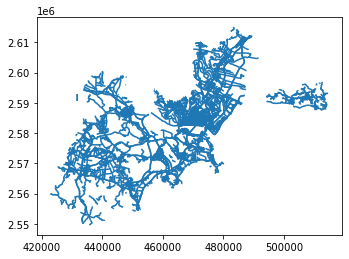

In [13]:
# 查看投影后的地图
roads_reprj.plot()

In [37]:
# 组合矢量文件中的所有几何要素为一个几何要素，便于计算面积和长度
water_one = water_reprj.unary_union
roads_one = roads_reprj.unary_union
trunk_one = trunk_reprj.unary_union
branch_one = branch_reprj.unary_union

In [38]:
# 计算水体总面积和道路总长度
print(water_one.area, "平方米")
print(roads_one.length, "米")
print(trunk_one.length, "米")
print(branch_one.length, "米")

133911938.71811022 平方米
5184268.642895201 米
2854445.2868977697 米
2330561.403780035 米


In [39]:
# 读取采样点的shapefile矢量数据
sample_points = geopandas.read_file("采样点")
sample_points

,ID,X,Y,geometry
0,1,116.585049,23.415959,POINT (116.58505 23.41596)
1,2,116.609023,23.404292,POINT (116.60902 23.40429)
2,3,116.608594,23.377914,POINT (116.60859 23.37791)
3,4,116.619452,23.376546,POINT (116.61945 23.37655)
4,5,116.624754,23.390995,POINT (116.62475 23.39100)
...,...,...,...,...
137,138,117.036165,23.443301,POINT (117.03616 23.44330)
138,139,117.092469,23.454714,POINT (117.09247 23.45471)
139,140,117.106547,23.475644,POINT (117.10655 23.47564)
140,141,117.128867,23.449203,POINT (117.12887 23.44920)


In [40]:
# 将采样点矢量数据重投影到跟水体和道路矢量数据相同的坐标系
points_reprj = sample_points.to_crs("EPSG:32650")

<AxesSubplot:>

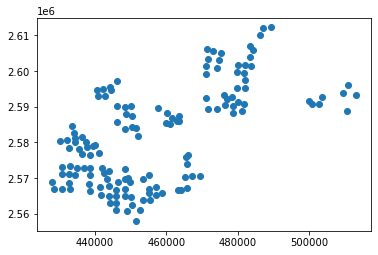

In [18]:
# 可视化
points_reprj.plot()

<AxesSubplot:>

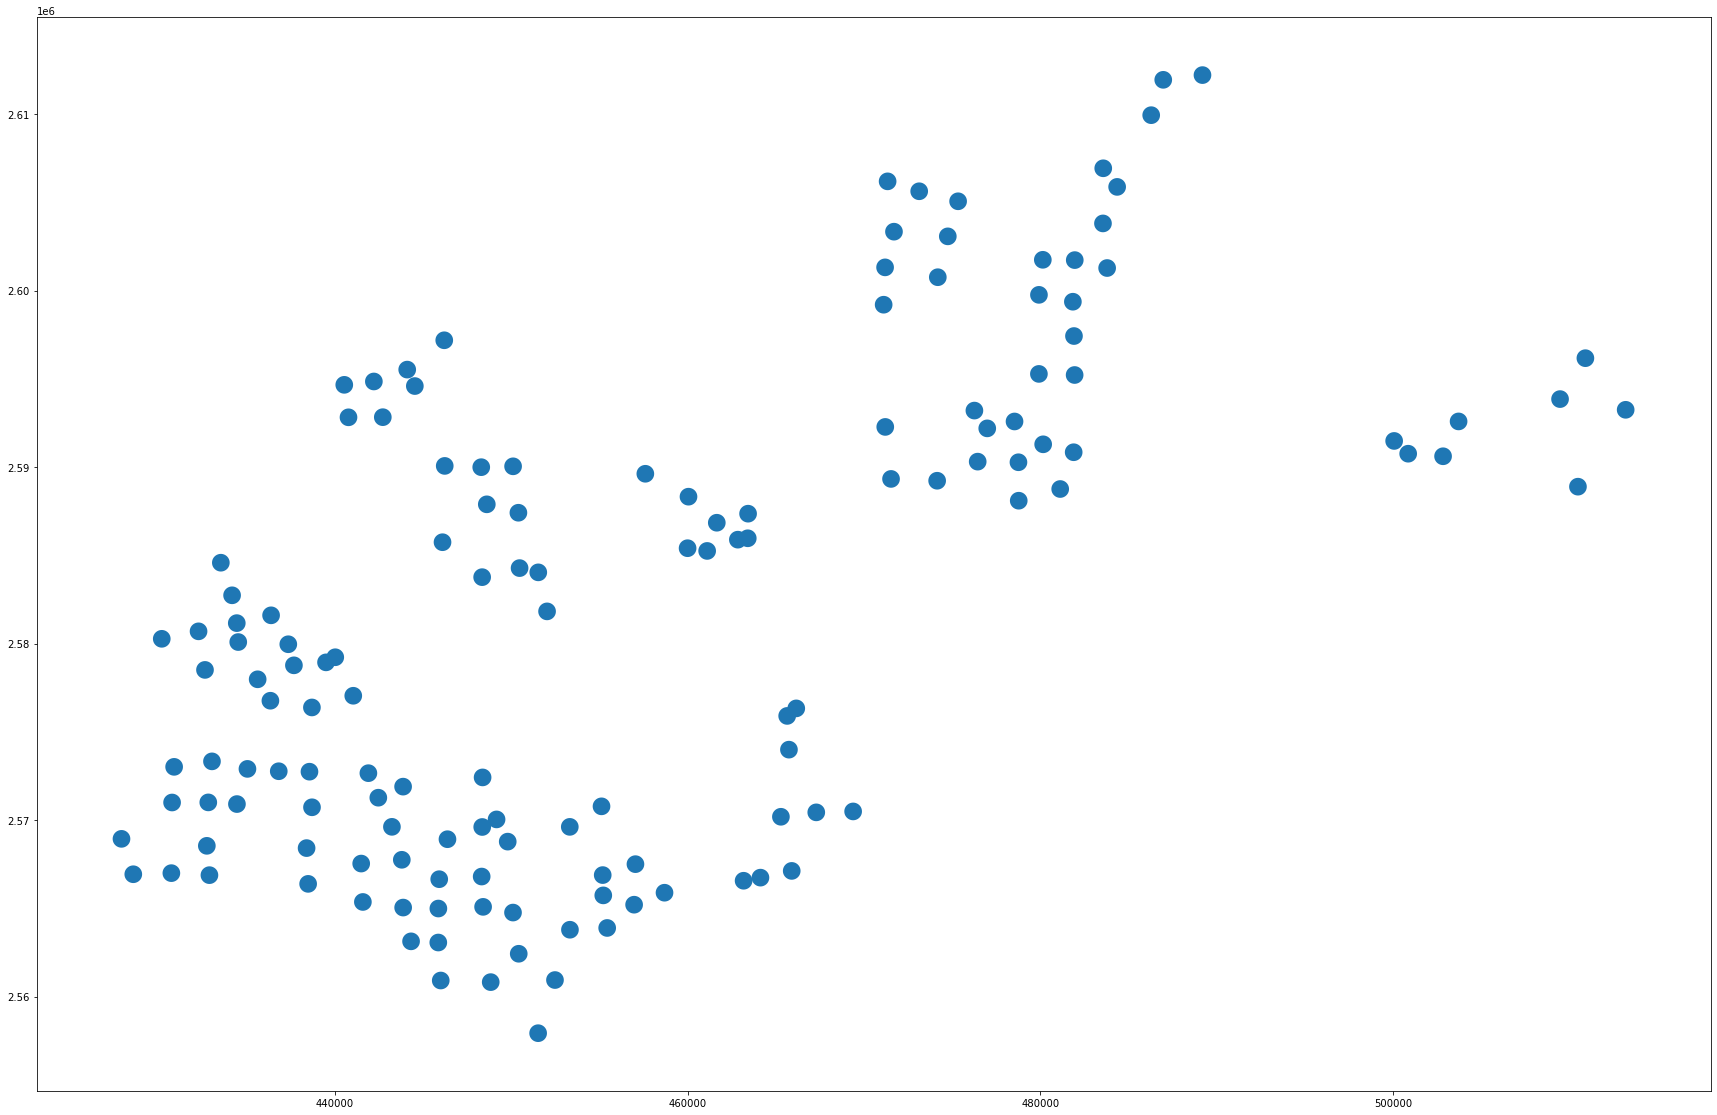

In [41]:
# 采样点建立500m圆形缓冲区
circle_500 = points_reprj.buffer(500)
circle_500.plot(figsize=(30,20))

In [20]:
# 500m缓冲区跟水体和路网矢量取交集
clips_water1 = circle_500.geometry.intersection(water_one)
clips_road1 = circle_500.geometry.intersection(roads_one)

In [42]:
# 500m缓冲区跟干线和支线矢量取交集
clips_trunk1 = circle_500.geometry.intersection(trunk_one)
clips_branch1 = circle_500.geometry.intersection(branch_one)

<AxesSubplot:>

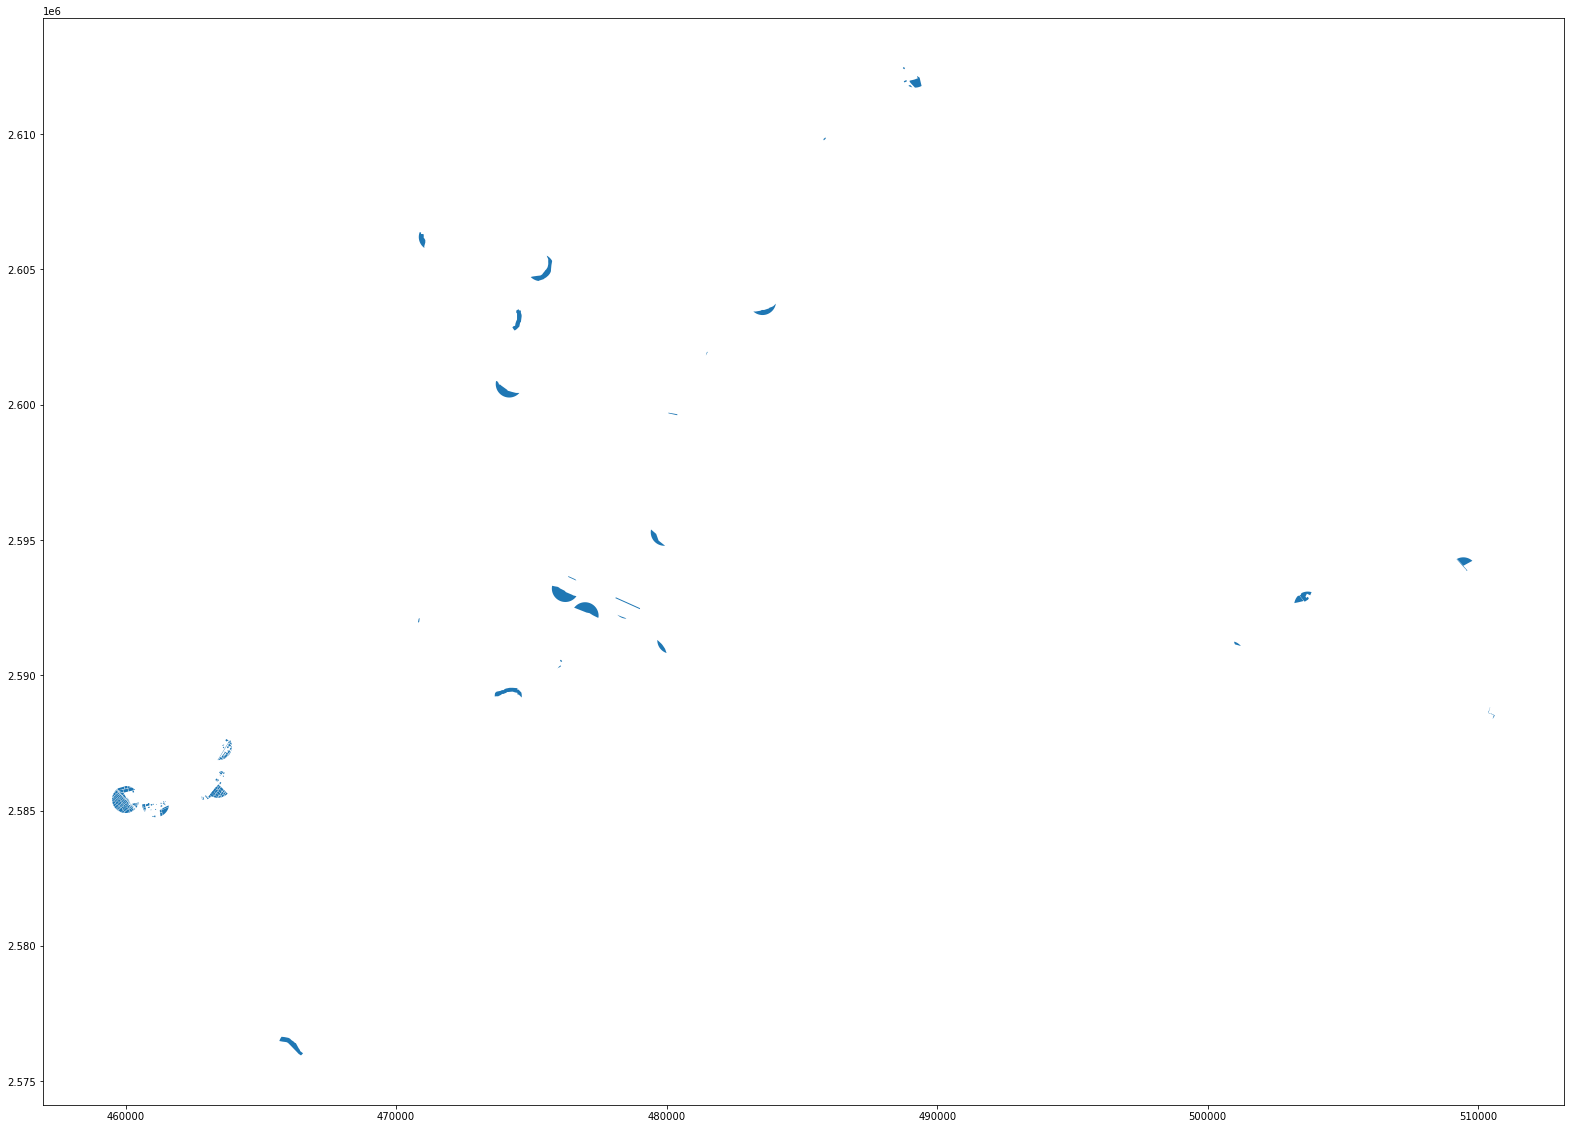

In [21]:
# 500m缓冲区跟水体交集可视化
clips_water1.plot(figsize=(30,20))

In [22]:
# 计算500m缓冲区内道路的长度
length_500 = clips_road1.length
length_500

0      1807.884619
1      1183.223721
2      1037.134330
3      4247.657646
4      2392.383270
          ...     
137    3598.653766
138    6840.456402
139     757.492699
140    2822.953314
141    9431.882704
Length: 142, dtype: float64

In [44]:
# 计算500m缓冲区内干线和支线的长度
trunk_length_500 = clips_trunk1.length
branch_length_500 = clips_branch1.length

In [46]:
branch_length_500

0       177.586086
1       199.364774
2      1037.134330
3      4247.657646
4      2271.007696
          ...     
137    2645.961374
138    3011.018655
139       0.000000
140     947.195114
141    4622.123573
Length: 142, dtype: float64

In [23]:
# 计算500m缓冲区内水体的面积
area_500 = clips_water1.area
area_500

0           0.000000
1           0.000000
2      443565.452214
3      114321.010249
4           0.000000
           ...      
137    134986.199717
138    109610.785162
139         0.000000
140         0.000000
141      7961.088289
Length: 142, dtype: float64

In [48]:
# 同上，计算1000m和2000m缓冲区内的水体面积和道路长度
circle_1000 = points_reprj.buffer(1000)
# clips_water2 = circle_1000.geometry.intersection(water_one)
clips_trunk2 = circle_1000.geometry.intersection(trunk_one)
clips_branch2 = circle_1000.geometry.intersection(branch_one)
# area_1000 = clips_water2.area
trunk_length_1000 = clips_trunk2.length
branch_length_1000 = clips_branch2.length

In [49]:
circle_2000 = points_reprj.buffer(2000)
# clips_water3 = circle_2000.geometry.intersection(water_one)
# clips_road3 = circle_2000.geometry.intersection(roads_one)
# area_2000 = clips_water3.area
clips_trunk3 = circle_2000.geometry.intersection(trunk_one)
clips_branch3 = circle_2000.geometry.intersection(branch_one)
trunk_length_2000 = clips_trunk3.length
branch_length_2000 = clips_branch3.length

<AxesSubplot:>

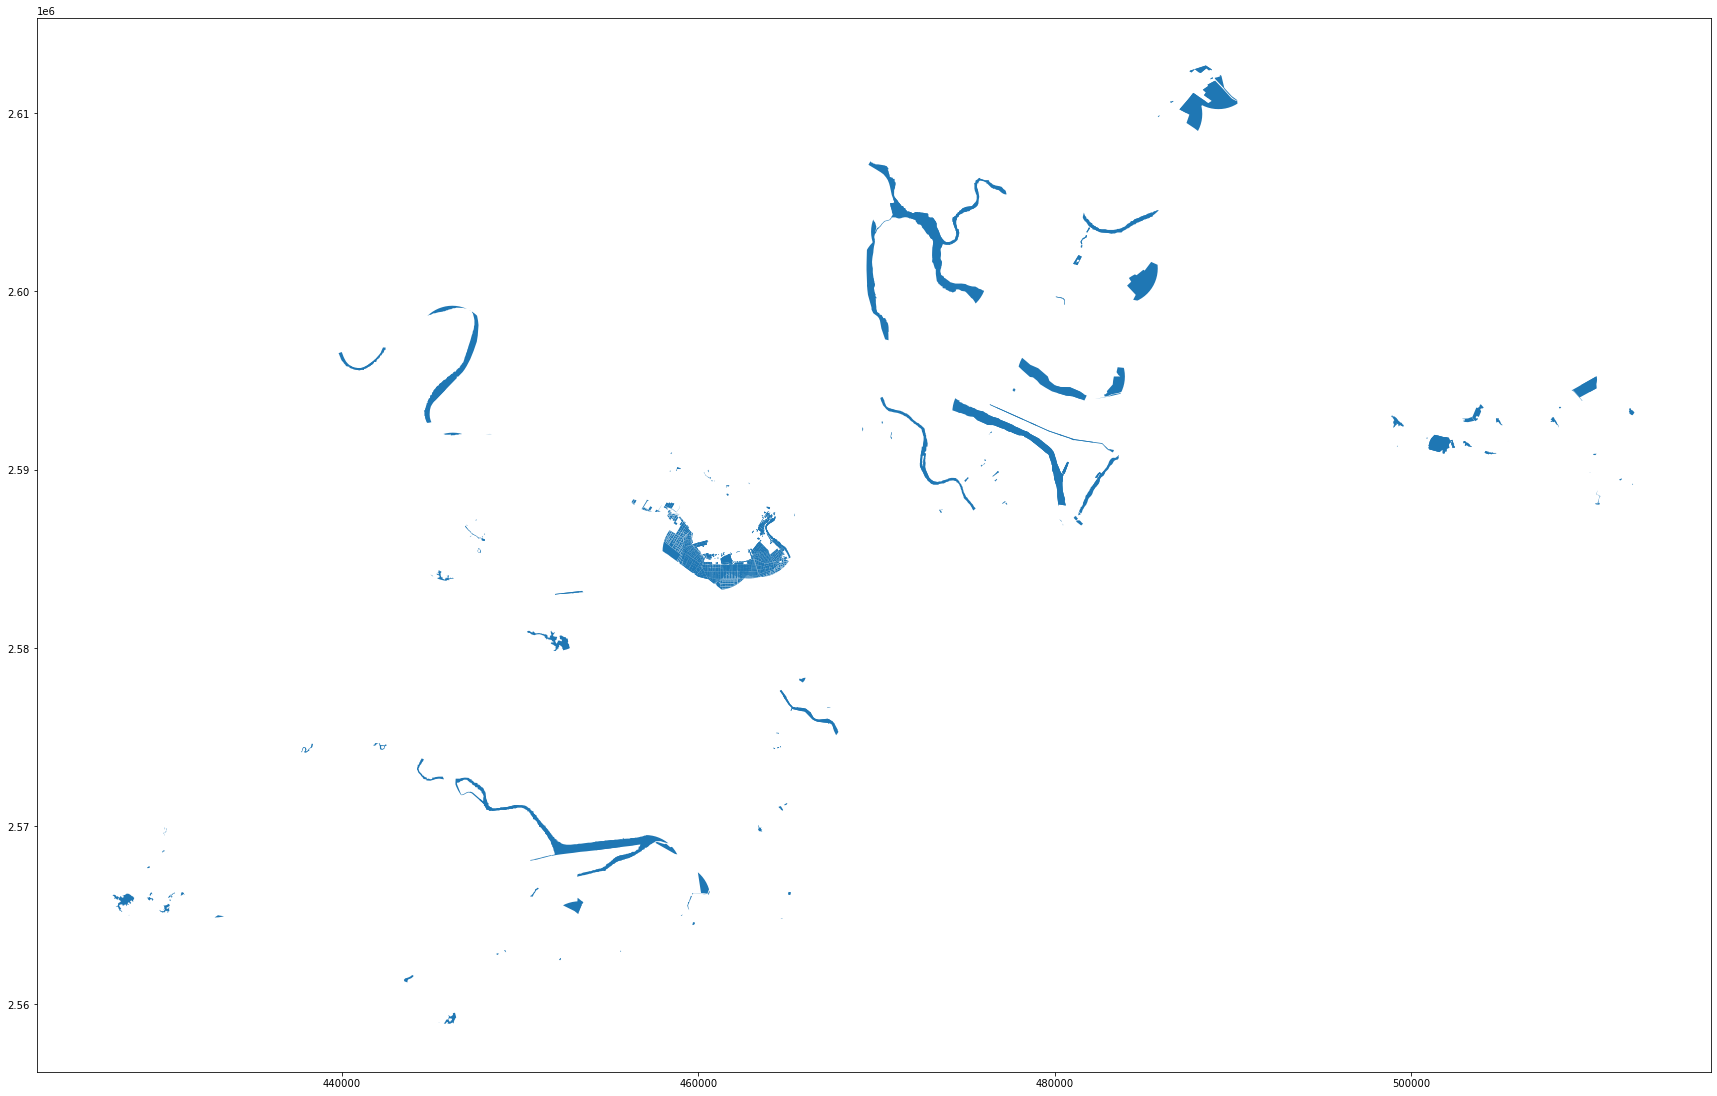

In [26]:
# 2000m缓冲区内水体可视化
clips_water3.plot(figsize=(30,20))

In [27]:
# 引入pandas库，将计算结果输出到表格
import pandas as pd

In [28]:
df_water_area = pd.DataFrame([area_500.T, area_1000.T, area_2000.T])
df_water_area = df_water_area.T
df_water_area.columns = ["500m_buff_area(m2)", "1000m_buff_area(m2)", "2000m_buff_area(m2)"]

In [29]:
# 查看水体面积计算结果表格
df_water_area

,500m_buff_area(m2),1000m_buff_area(m2),2000m_buff_area(m2)
0,0.000000,2.050787e+03,2.969693e+05
1,0.000000,0.000000e+00,5.766452e+05
2,443565.452214,1.631654e+06,4.819503e+06
3,114321.010249,8.957741e+05,4.595771e+06
4,0.000000,0.000000e+00,4.900737e+05
...,...,...,...
137,134986.199717,3.444146e+05,6.257919e+05
138,109610.785162,5.043770e+05,8.481122e+05
139,0.000000,0.000000e+00,4.267782e+05
140,0.000000,6.953179e+04,6.953179e+04


In [51]:
# 将干线长度计算结果转为表格
df_trunk_length = pd.DataFrame([trunk_length_500, trunk_length_1000, trunk_length_2000])
df_trunk_length = df_trunk_length.T
df_trunk_length.columns = ["500m_buff_length(m)", "1000m_buff_length(m)", "2000m_buff_length(m)"]

In [52]:
# 将支线长度计算结果转为表格
df_branch_length = pd.DataFrame([branch_length_500, branch_length_1000, branch_length_2000])
df_branch_length = df_branch_length.T
df_branch_length.columns = ["500m_buff_length(m)", "1000m_buff_length(m)", "2000m_buff_length(m)"]

In [53]:
# 结果保存为csv文件
df_water_area.to_csv("缓冲区内水体面积.csv")
df_trunk_length.to_csv("缓冲区内干线长度.csv")
df_branch_length.to_csv("缓冲区内支线长度.csv")